In [20]:
using DelimitedFiles

In [21]:
using Statistics

using Plots

In [22]:
Ydata = readdlm("Project2DataV1.txt")

362×8 Matrix{Any}:
 "datetime"      "tempmax"    "tempmin"    "temp"  ""  ""  ""  ""
 "1/1/2022"    40.9         29.6         34.8      ""  ""  ""  ""
 "1/2/2022"    29.1         15.9         23.5      ""  ""  ""  ""
 "1/3/2022"    23.5         10.3         17.2      ""  ""  ""  ""
 "1/4/2022"    35.4         23.4         29.8      ""  ""  ""  ""
 "1/5/2022"    34.7         13.4         19.7      ""  ""  ""  ""
 "1/6/2022"    15.9          6           11.2      ""  ""  ""  ""
 "1/7/2022"    14.5          0.6          8.0      ""  ""  ""  ""
 "1/8/2022"    35.5         14.6         24.3      ""  ""  ""  ""
 "1/9/2022"    35.4         11.4         24.8      ""  ""  ""  ""
 "1/10/2022"   18.0          8           13.9      ""  ""  ""  ""
 "1/11/2022"   36.9          6.4         21.2      ""  ""  ""  ""
 "1/12/2022"   41.9         33           37.2      ""  ""  ""  ""
 ⋮                                                     ⋮       
 "12/21/2022"  32.1         15.2         23.8      ""  ""  

In [23]:
Ydata1 = Ydata[1:361,1:4]
# there were some additional empty strings which i edited

361×4 Matrix{Any}:
 "datetime"      "tempmax"    "tempmin"    "temp"
 "1/1/2022"    40.9         29.6         34.8
 "1/2/2022"    29.1         15.9         23.5
 "1/3/2022"    23.5         10.3         17.2
 "1/4/2022"    35.4         23.4         29.8
 "1/5/2022"    34.7         13.4         19.7
 "1/6/2022"    15.9          6           11.2
 "1/7/2022"    14.5          0.6          8.0
 "1/8/2022"    35.5         14.6         24.3
 "1/9/2022"    35.4         11.4         24.8
 "1/10/2022"   18.0          8           13.9
 "1/11/2022"   36.9          6.4         21.2
 "1/12/2022"   41.9         33           37.2
 ⋮                                       
 "12/20/2022"  32.8         22           27.7
 "12/21/2022"  32.1         15.2         23.8
 "12/22/2022"  33.3         -3.9         20.8
 "12/23/2022"  -0.8         -8.7         -4.3
 "12/24/2022"  13.4         -0.8          6.2
 "12/25/2022"  14.1          2.2          8.7
 "12/26/2022"  22.0         13.4         17.9
 "12/27/2022"  

In [24]:
using FFTW


Selecting the average data to make a graph

In [25]:
# For the Average temperatures
Ydataavg1 = Ydata1[2:361,4]

360-element Vector{Any}:
 34.8
 23.5
 17.2
 29.8
 19.7
 11.2
  8.0
 24.3
 24.8
 13.9
 21.2
 37.2
 37.0
  ⋮
 27.7
 23.8
 20.8
 -4.3
  6.2
  8.7
 17.9
 17.2
 36.6
 51.5
 42.9
 32.9

This represents the average of the data, that we will use as our Y intercept

In [26]:
dataAverage=mean(Ydataavg1)

52.63583333333341

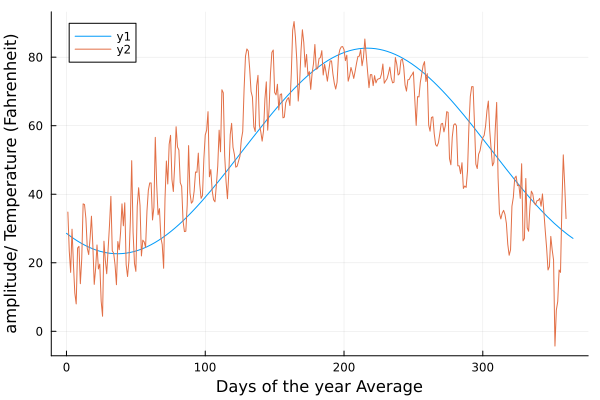

In [27]:
t = 1:360
y2 = Ydataavg1 
f(x)= dataAverage + 30sin(2*x*pi/360 +180)#the best that can be proved this will be changed with the other graph 
plot(f, 0,365)
plot!(t,y2,xlabel="Days of the year Average",ylabel="amplitude/ Temperature (Fahrenheit)")



# Outcome: 
We have a sin graph plotted along with our average data for one year. We see that the sine graph can be seen as a guide on the temperature, were half a period can be immitated by our data. Our data has a similar curve to the sin graph ``80sin*(x*pi/365)

this is our graph with just one sine function, we are now just going to graph another one. 

# Second graph: 

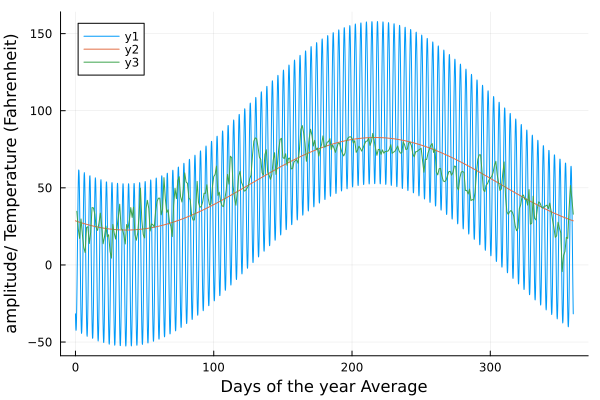

In [28]:
t = 1:360
y2 = Ydataavg1 
f(x)= dataAverage + 30*sin(2*x*pi/360 +180)#the best that can be proved this will be changed with the other graph 
g(x)= dataAverage +dataAverage*sin(2*x*pi/4 +180) + dataAverage*sin(2*x*pi/360 +180)
plot(g,0,360)
plot!(f, 0,360)
plot!(t,y2,xlabel="Days of the year Average",ylabel="amplitude/ Temperature (Fahrenheit)")


#for the 30 we used it because it represents the average of 30 days per month. 


In [15]:
Ydataavg = convert(Array{Float64}, Ydataavg1)
# https://stackoverflow.com/questions/35482527/how-do-i-change-the-data-type-of-a-julia-array-from-any-to-float64

360-element Vector{Float64}:
 34.8
 23.5
 17.2
 29.8
 19.7
 11.2
  8.0
 24.3
 24.8
 13.9
 21.2
 37.2
 37.0
  ⋮
 27.7
 23.8
 20.8
 -4.3
  6.2
  8.7
 17.9
 17.2
 36.6
 51.5
 42.9
 32.9

In [16]:
F = fft(Ydataavg)



360-element Vector{ComplexF64}:
             18948.9 + 0.0im
  -4610.158386650318 + 1558.8777591451524im
  -256.7461594642394 + 91.90967056296378im
  -299.1673423478911 + 52.890033221164im
 -176.83469536031342 + 224.53848942628406im
    98.5650155351641 - 121.99810410402586im
   283.7184026333639 - 152.4504692298271im
 -61.934019872589445 + 136.11575126518818im
 -212.15850898048663 + 168.48457531378045im
  -186.5324689513031 - 314.4120949519449im
  -34.54060757962575 - 158.28112933743557im
  201.39438666110834 - 457.6452934272618im
  48.072915097220864 - 196.63353849843372im
                     ⋮
   48.07291509722083 + 196.63353849843378im
   201.3943866611084 + 457.6452934272618im
  -34.54060757962576 + 158.28112933743554im
  -186.5324689513031 + 314.4120949519449im
 -212.15850898048663 - 168.48457531378045im
  -61.93401987258968 - 136.11575126518804im
  283.71840263336395 + 152.4504692298271im
   98.56501553516414 + 121.99810410402576im
 -176.83469536031342 - 224.538489426284im
  -2

### Here is where we are going to be taking the frequency

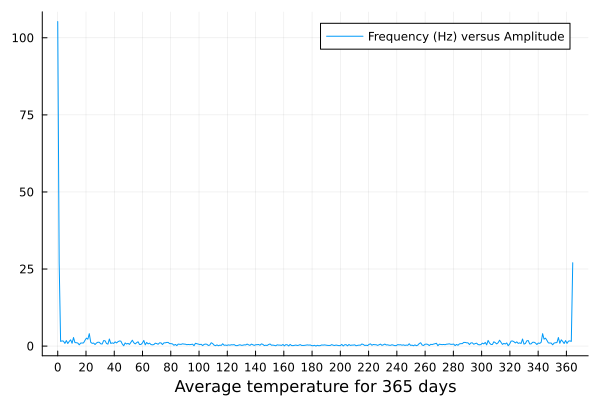

In [17]:
n = length(Ydataavg)/2
amps = abs.(F)/n
dt = 0.002736
freq = [0:359]/(2*n*dt)

plot(freq, amps[1:360],xlabel="Average temperature for 365 days", xticks=0:20:360,label="Frequency (Hz) versus Amplitude")

check where the max amplitude occurs or something i guess, it is spectral analysis of the signal. ask for specificaiton. What is the meaning behind this graph. 

one peak of sin function and then the other peak at the other graph is the discreptancy of temperature during the day. 

# End of 2022 data above

# Now we are goign to do this with the year 2021

In [35]:
year2021DataAvg = readdlm("year2021Data.txt")

366×4 Matrix{Any}:
 "datetime"    "tempmax"    "tempmin"    "temp"
 "1/1/21"    35.2         24           30.8
 "1/2/21"    35.6         29.9         33
 "1/3/21"    33.9         27.5         31.7
 "1/4/21"    30           25.1         27.3
 "1/5/21"    35.8         29.1         32.4
 "1/6/21"    39.2         29.8         34.4
 "1/7/21"    37.9         34.9         36.6
 "1/8/21"    36.1         30.5         33.8
 "1/9/21"    37.5         27.6         32
 "1/10/21"   30.3         25.8         28.4
 "1/11/21"   30           22           26.3
 "1/12/21"   38.4         26.4         31.4
 ⋮                                     
 "12/20/21"  43.4         31           35.8
 "12/21/21"  42.1         26.8         33.9
 "12/22/21"  31.5         20.5         26.6
 "12/23/21"  46.6         28.7         37.9
 "12/24/21"  57.3         36           48.4
 "12/25/21"  57           34.9         45.4
 "12/26/21"  42.8         29.9         36.8
 "12/27/21"  47.3         34.4         40.5
 "12/28/21"  38.3

In [36]:
#Now we do the same but with the previous year. 
year2021Data= year2021DataAvg[2:361,4]

360-element Vector{Any}:
 30.8
 33
 31.7
 27.3
 32.4
 34.4
 36.6
 33.8
 32
 28.4
 26.3
 31.4
 36.3
  ⋮
 60.3
 46.7
 35.1
 37.4
 34
 35.8
 33.9
 26.6
 37.9
 48.4
 45.4
 36.8

In [37]:
data2021Average=mean(year2021Data)

54.30305555555554

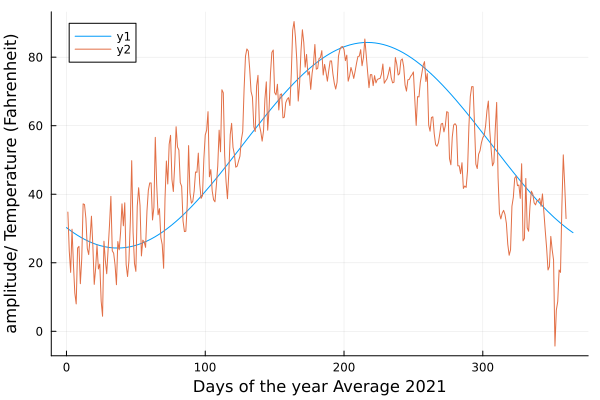

In [39]:
t = 1:360
y3 = year2021Data 
f(x)= data2021Average + 30sin(2*x*pi/360 +180)#the best that can be proved this will be changed with the other graph 
plot(f, 0,365)
plot!(t,y2,xlabel="Days of the year Average 2021",ylabel="amplitude/ Temperature (Fahrenheit)")



# Second graph (with daily variaiton in weather )

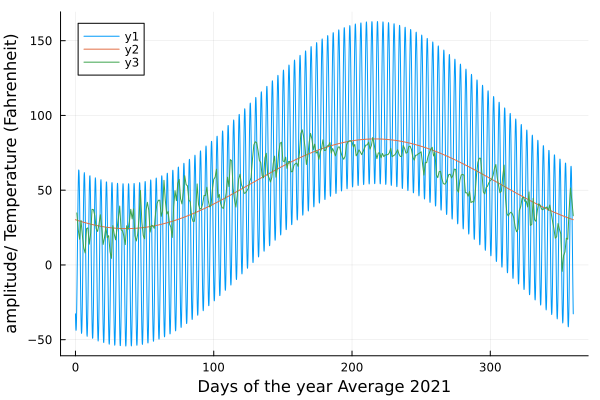

In [40]:
t = 1:360
y3 = year2021Data 
f(x)= data2021Average + 30*sin(2*x*pi/360 +180)#the best that can be proved this will be changed with the other graph 
g(x)= data2021Average +data2021Average*sin(2*x*pi/4 +180) + data2021Average*sin(2*x*pi/360 +180)
plot(g,0,360)
plot!(f, 0,360)
plot!(t,y2,xlabel="Days of the year Average 2021",ylabel="amplitude/ Temperature (Fahrenheit)")


#for the 30 we used it because it represents the average of 30 days per month. 


In [41]:
Ydataavg2021 = convert(Array{Float64},year2021Data )


360-element Vector{Float64}:
 30.8
 33.0
 31.7
 27.3
 32.4
 34.4
 36.6
 33.8
 32.0
 28.4
 26.3
 31.4
 36.3
  ⋮
 60.3
 46.7
 35.1
 37.4
 34.0
 35.8
 33.9
 26.6
 37.9
 48.4
 45.4
 36.8

In [42]:
F=fft(Ydataavg2021)

360-element Vector{ComplexF64}:
             19549.1 + 0.0im
  -4081.036644737743 + 1917.671471380307im
  -404.6734126635184 + 165.0429217612113im
  207.59263365548435 + 194.8574612948812im
   704.6192612185022 + 469.95188546292695im
   612.5786774084748 - 232.39905773421043im
 -12.124609256127435 - 50.938444993873844im
  -62.81951157858879 - 193.01265164894605im
  -194.5886553027978 - 195.96787193426377im
 -137.31719032828403 + 127.3546677763165im
  -197.8957464243581 + 407.58438971001056im
   26.83995177666359 + 259.4012608389746im
  111.32952530191767 + 29.997395350397504im
                     ⋮
  111.32952530191767 - 29.997395350397497im
   26.83995177666372 - 259.4012608389743im
  -197.8957464243581 - 407.58438971001056im
   -137.317190328284 - 127.35466777631657im
 -194.58865530279778 + 195.96787193426377im
  -62.81951157858907 + 193.0126516489462im
 -12.124609256127457 + 50.93844499387386im
   612.5786774084747 + 232.39905773421043im
   704.6192612185021 - 469.9518854629269im
 

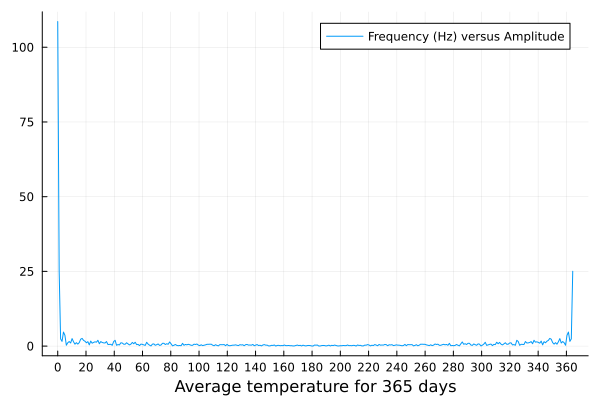

In [43]:
n2 = length(Ydataavg2021)/2
amps = abs.(F)/n2
dt = 0.002736
freq = [0:359]/(2*n2*dt)

plot(freq, amps[1:360],xlabel="Average temperature for 365 days Year 2021", xticks=0:20:360,label="Frequency (Hz) versus Amplitude")

# Outcome: 
Here we see compared from the previous graph that there is adrop towards the end of the graph where previously we see that it ended around 28, an estimation, now we see that it ends before or at 25. 

In [14]:
#yfloat = Float32(y2)

# Ask about

the inverse graph and its meaning

If our sin graph is correctly plotted along with the average data ploted? 

